# Cardio Disease Classification

## Imports and read form csv:

In [43]:
# Basic imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# preprocessing and split
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
# Scores and reports
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
df = pd.read_csv('data/data.csv')


## Basic info:

In [44]:
df.shape

(70000, 14)

In [45]:
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [46]:
df.tail()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [48]:
df.isna().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values!  
And all the values are numeric.

## Preproces Data:

### Clean the data

#### We can see that there are some unnecessary columns, so we can throw them

In [49]:
# Drop id col
df.drop(['id'], axis = 1, inplace= True)
# Round float
df['age_year'] = df['age_year'].round(0)
df['weight'] = df['weight'].round(0)
# There are some errors in the data ap_hi always biger then ap_lo 
# lats drop this errors:
df = df[df['ap_lo']<df['ap_hi']]

df

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,61.0,1,163,72.0,135,80,1,2,0,0,0,1


### Add features

#### BMI - 
```"BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height." - wikipedia```

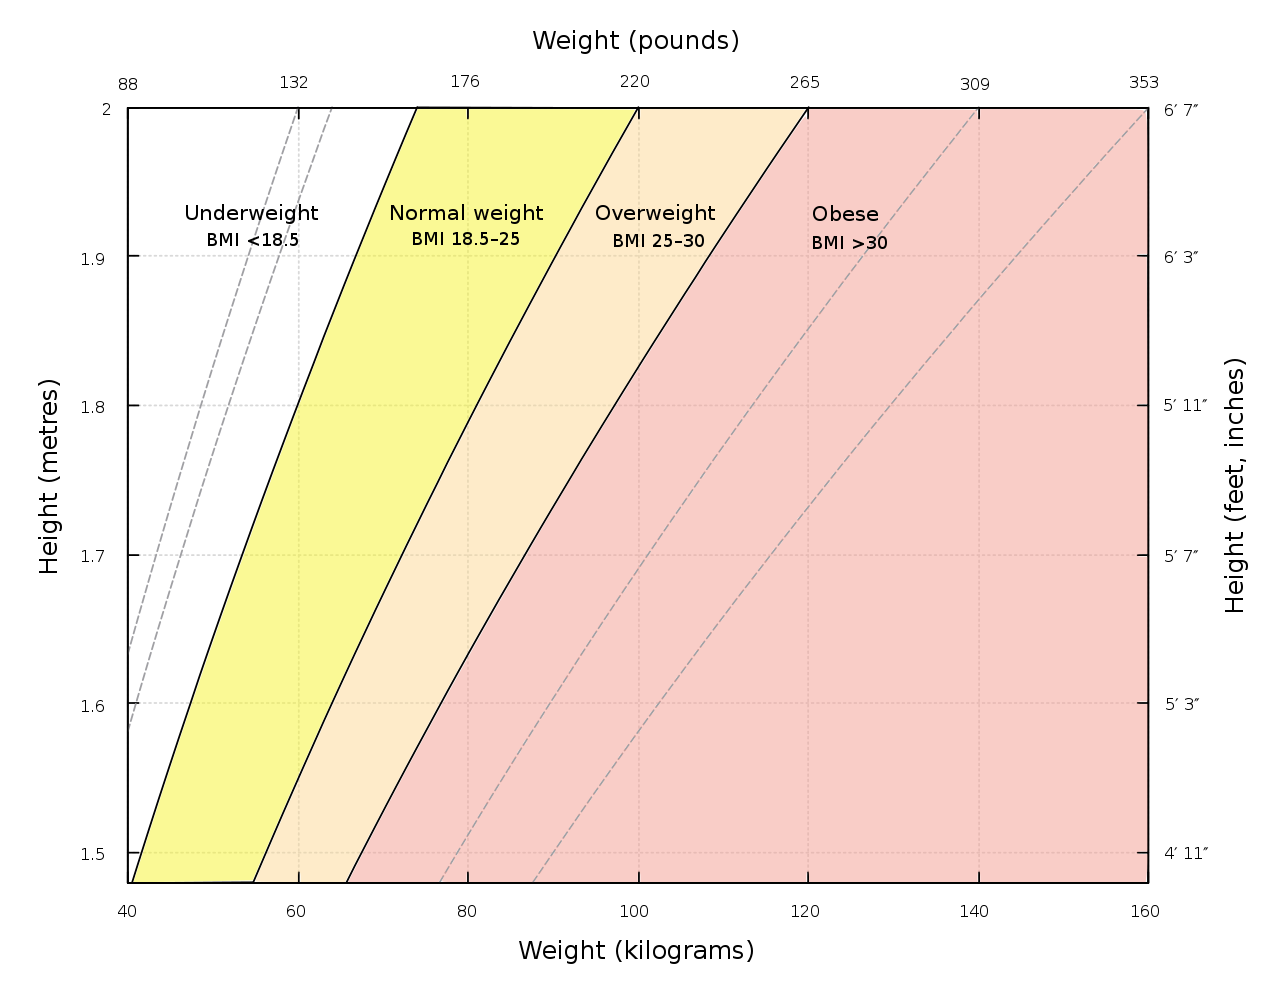

In [50]:
# add BMI:
df['BMI'] = (df["weight"] / (df["height"]/100)**2).round(0)

#### MAP - 
```"The mean arterial pressure (MAP) is an average blood pressure in an individual during a single cardiac cycle." - wikipedia```

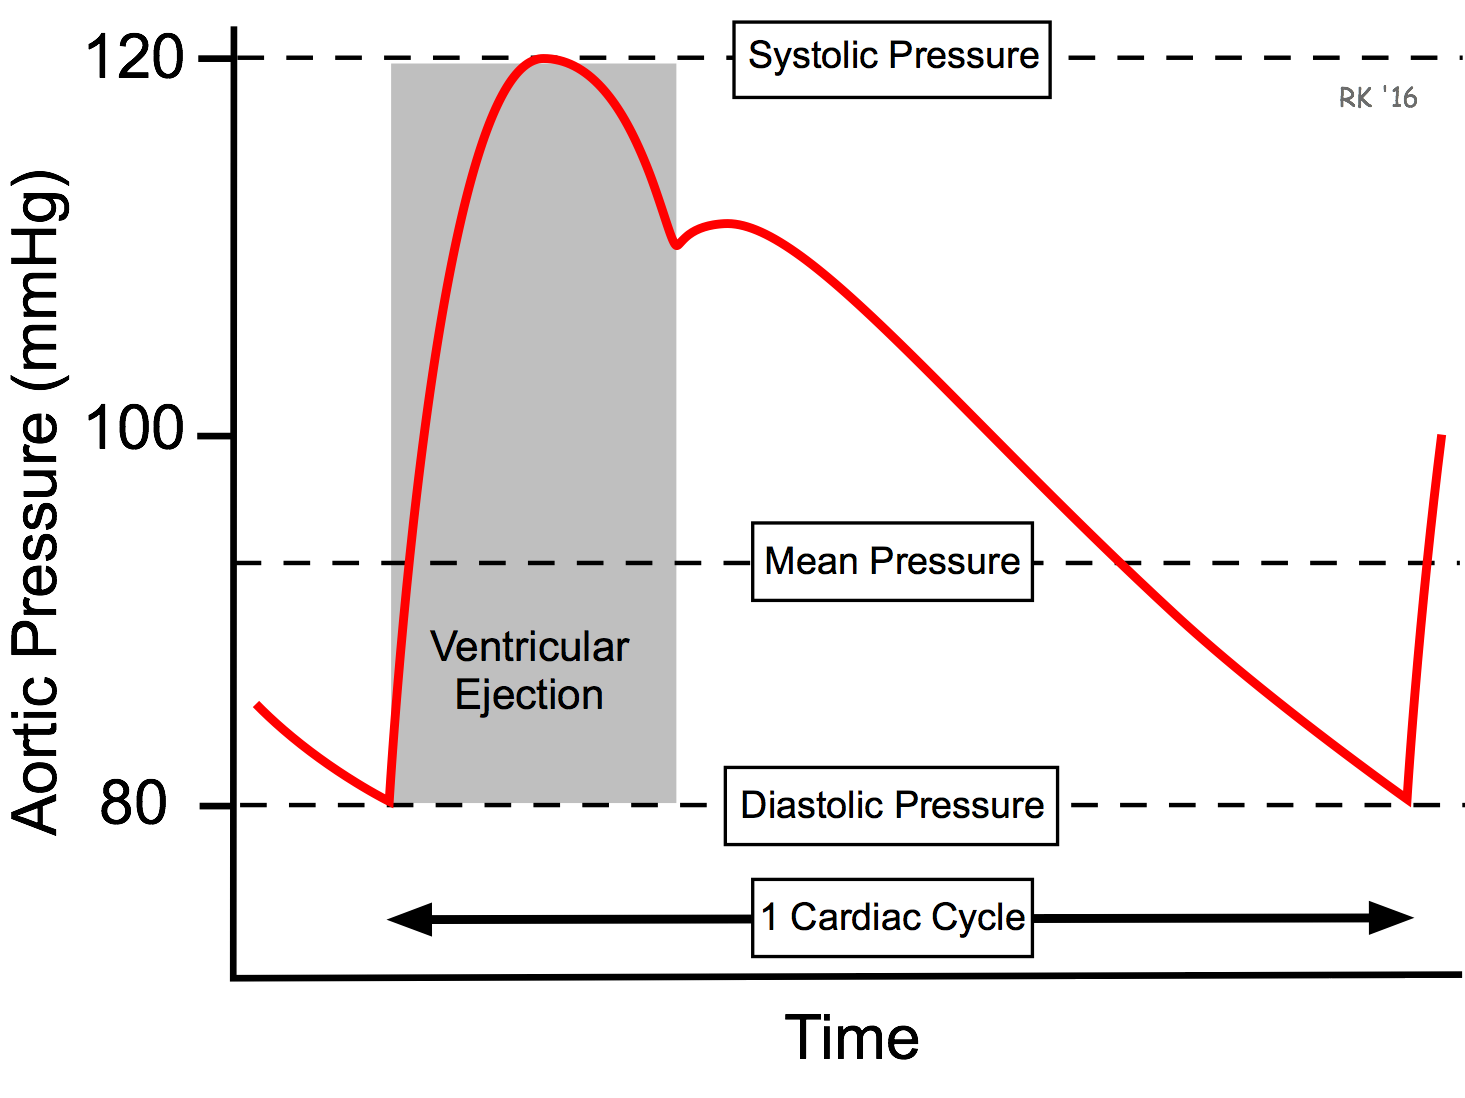

In [51]:
# add MAP:
df['MAP'] = (((df["ap_lo"]*2) + df["ap_hi"])/3).round(0)

## Visualization:

### Lets see how the data split between the class

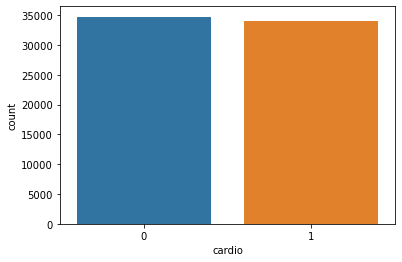

In [52]:
sns.countplot(df['cardio']) # count the number of patients with or witout cardio.

### The number of patients is divided almost equally!

### Now lats correlation between features:

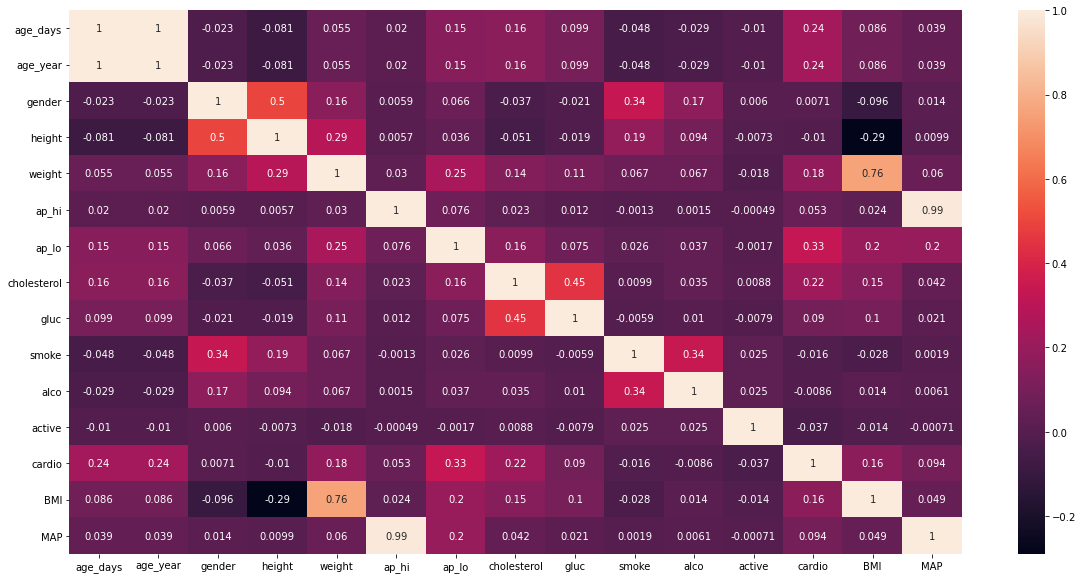

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### At first glance we can't find strong correlation between features

cardio
0    46737
1    45999
Name: gender, dtype: int64


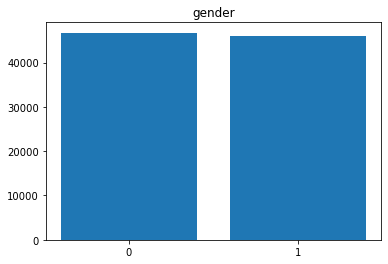

cardio
0    42242
1    51598
Name: cholesterol, dtype: int64


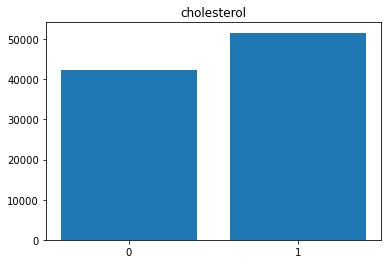

cardio
0    40817
1    43459
Name: gluc, dtype: int64


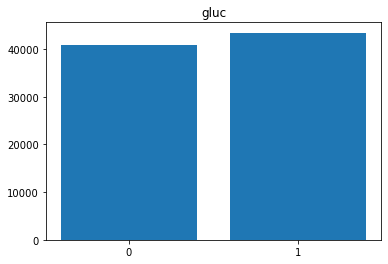

cardio
0    3212
1    2831
Name: smoke, dtype: int64


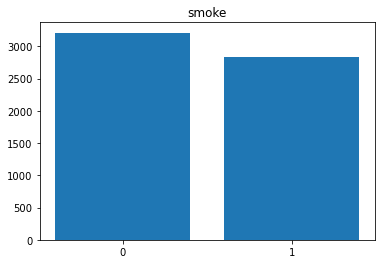

cardio
0    1920
1    1748
Name: alco, dtype: int64


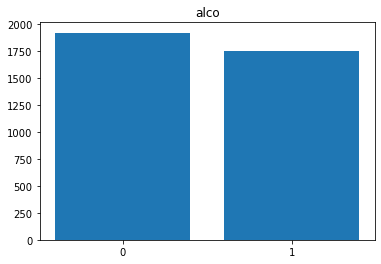

cardio
0    28424
1    26825
Name: active, dtype: int64


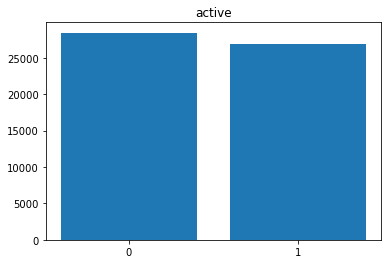

cardio
0    921804.0
1    970180.0
Name: BMI, dtype: float64


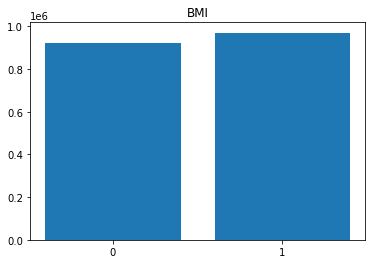

cardio
0    3200081.0
1    3470796.0
Name: MAP, dtype: float64


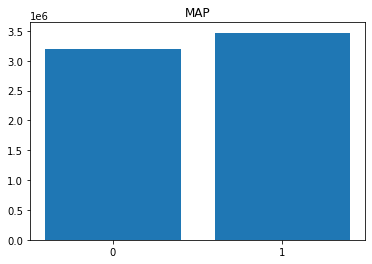

,gender,cholesterol,gluc,smoke,alco,active,BMI,MAP
cardio,,,,,,,,
0,46737,42242,40817,3212,1920,28424,921804.0,3200081.0
1,45999,51598,43459,2831,1748,26825,970180.0,3470796.0


In [54]:
to_plot = df.groupby(['cardio']).sum().drop(['age_year','age_days','height','weight','ap_hi','ap_lo'] , axis =1)

for i in to_plot.columns:
    plt.subplot(title = i)
    plt.bar(['0','1'] , to_plot[i] )
    print(to_plot[i])
    plt.show()
    
to_plot

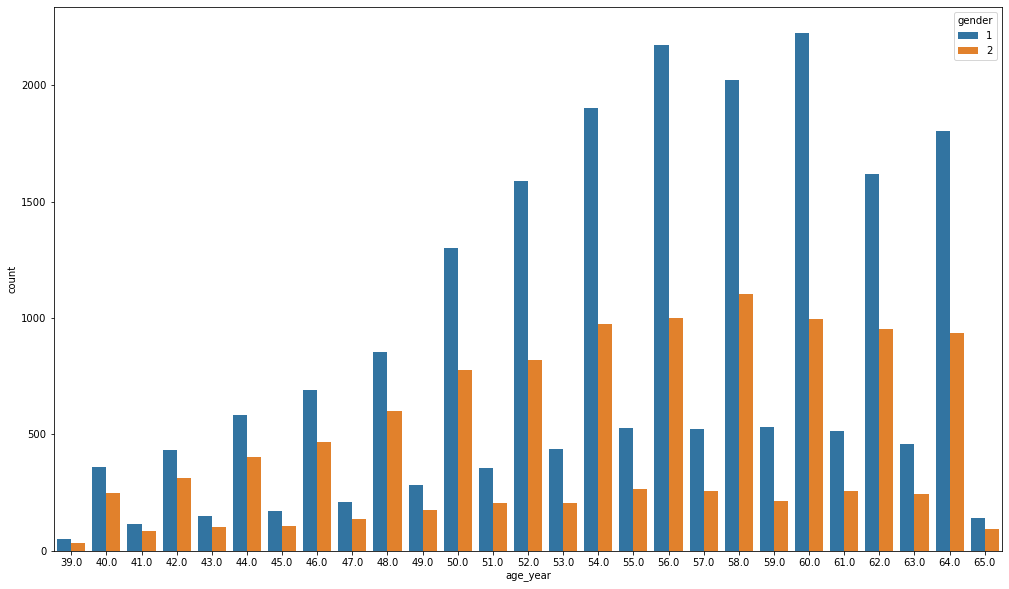

In [55]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['cardio'] == 1)], x='age_year' ,hue='gender')
plt.show()

In [56]:
df.drop(['age_year'], axis = 1, inplace= True)

## Models:

In [57]:
# Split Data
y = df['cardio']
x = df.drop(['cardio'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)

In [58]:
KNN = KNeighborsClassifier(n_neighbors=100).fit(scal_x_train, y_train)
LR = LogisticRegression().fit(scal_x_train, y_train)
Dummy = DummyClassifier(strategy='most_frequent').fit(scal_x_train, y_train)

### Lats test our models:

In [59]:
# Simpel score test:
print("KNeighborsClassifier mean accuracy: {:.2f}%".format(KNN.score(scal_x_test, y_test)*100))
print("LogisticRegression mean accuracy: {:.2f}%".format(LR.score(scal_x_test, y_test)*100))
print("DummyClassifier mean accuracy: {:.2f}%".format(Dummy.score(scal_x_test, y_test)*100))


KNeighborsClassifier mean accuracy: 70.28%
LogisticRegression mean accuracy: 71.98%
DummyClassifier mean accuracy: 50.83%


In [60]:
# List of all model and there names:
model = [(Dummy, "DummyClassifier"), (LR, "LogisticRegression"),(KNN, "KNeighborsClassifier")]

### classification report and confusion matrix:

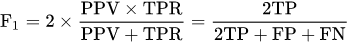

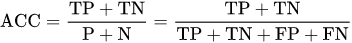

DummyClassifier  Classification Report
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      6990
           1       0.00      0.00      0.00      6763

    accuracy                           0.51     13753
   macro avg       0.25      0.50      0.34     13753
weighted avg       0.26      0.51      0.34     13753



/Users/ortrabelsi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


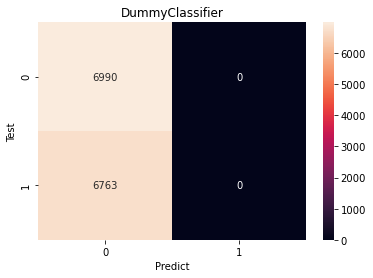

LogisticRegression  Classification Report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6990
           1       0.74      0.67      0.70      6763

    accuracy                           0.72     13753
   macro avg       0.72      0.72      0.72     13753
weighted avg       0.72      0.72      0.72     13753



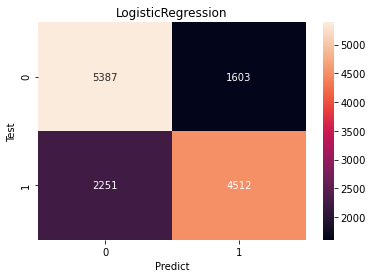

KNeighborsClassifier  Classification Report
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6990
           1       0.72      0.65      0.68      6763

    accuracy                           0.70     13753
   macro avg       0.70      0.70      0.70     13753
weighted avg       0.70      0.70      0.70     13753



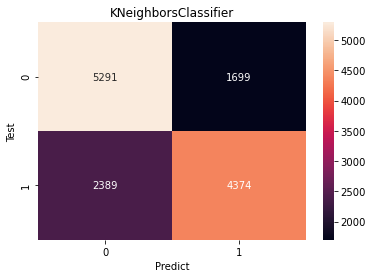

In [61]:
for i , j in model:
    train_pred = i.predict(scal_x_train)
    y_pred = i.predict(scal_x_test)

    
    print( j,' Classification Report')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.subplots()
    plt.title(j)
    sns.heatmap(cm,fmt=".0f", annot=True)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.show()

Text(0.5, 1.0, 'ROC')

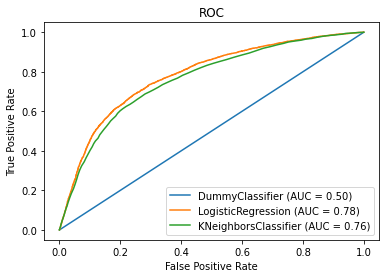

In [62]:
#ROC curves
plot = plt.subplot()
plot_roc_curve(Dummy,scal_x_test, y_test, ax = plot, name= 'DummyClassifier')
plot_roc_curve(LR,scal_x_test, y_test, ax = plot, name= 'LogisticRegression')
plot_roc_curve(KNN,scal_x_test, y_test, ax = plot, name= 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
